In [23]:
import tensorflow as tf
tf.__version__
tf.config.experimental.enable_op_determinism()
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [24]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [25]:
def plot_correlation_matrix(df):
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix Heatmap")
    plt.show()

In [26]:
def plot_columns(df):
    colors = plt.cm.tab20(range(df.shape[1]))  

    for i, column in enumerate(df.columns):
        color = colors[i % 24]

        plt.figure()
        plt.plot(df.index, df[column], color=color)
        plt.xlabel('Tempo')
        plt.ylabel('Valor')
        plt.title(column)

    plt.show()

In [27]:
def plot_correlation_matrix(df):
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix Heatmap")
    plt.show()

In [28]:
tf.keras.backend.clear_session()

In [29]:
subject = 'Pernambuco - Consumo de Cimento (t)'
start_index = 0
split_index = 179
window_size = 36
train_split = split_index + 1 - 12

In [30]:
data = pd.read_csv('2003_raw_Pernambuco_input.csv')
pd.set_option('display.max_columns', None)
data = data.replace(-1.0, np.nan)
data

,data,Pernambuco - PIB - Per Capita,Pernambuco - PIB - Preços de Mercado,Pernambuco - PIB - Estadual,Pernambuco - PIB - Construção Civil,Pernambuco - População,Pernambuco - INCC (%),Pernambuco - IPCA - Variação mensal durante o Plano Real (%),Pernambuco - IGP-DI,Pernambuco - Taxa Selic (%),Pernambuco - IDH - Longevidade,Pernambuco - IDH - Renda,Pernambuco - IDH - Educação,Pernambuco - NFSP - Fluxo Mensal (Milhões de reais),Pernambuco - Estoque liquido de capital fixo - (R$),Pernambuco - Desemprego,Pernambuco - Produção de Cimento (t),Pernambuco - Valor,Pernambuco - Consumo de Cimento (t)
0,2003-01-01,4.932679e+06,2.596494e+06,0.610128,6.375647e+06,8084667.0,1.70,12.53,2.70,0.082293,0.705,0.615,0.372,3.46,6.098524e+06,11.0054,NaN,0.3100,99743.0
1,2003-02-01,4.932679e+06,2.596494e+06,0.610128,6.375647e+06,8084667.0,1.51,2.25,2.17,0.088771,0.705,0.615,0.372,3.59,6.172460e+06,11.0054,29823.0,0.3400,86997.0
2,2003-03-01,4.932679e+06,2.596494e+06,0.610128,6.375647e+06,8084667.0,1.39,3.86,1.59,0.090733,0.705,0.615,0.372,3.84,6.172460e+06,11.0054,53944.0,0.3400,83033.0
3,2003-04-01,4.932679e+06,2.596494e+06,0.610128,6.375647e+06,8084667.0,1.38,5.13,1.66,0.092749,0.705,0.615,0.372,3.95,6.172460e+06,11.0054,112577.0,0.3400,82302.0
4,2003-05-01,4.932679e+06,2.596494e+06,0.610128,6.375647e+06,8084667.0,0.90,6.15,0.41,0.092758,0.705,0.615,0.372,4.06,6.172460e+06,11.0054,42953.0,0.3400,80217.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,2019-08-01,7.878345e+06,1.329347e+07,0.829623,3.834025e+06,9496294.0,0.58,2.42,-0.01,0.024620,0.820,0.680,0.690,0.69,7.827728e+06,12.3000,292545.0,0.4066,140408.0
200,2019-09-01,7.878345e+06,1.329347e+07,0.829623,3.834025e+06,9496294.0,0.42,2.54,-0.51,0.022751,0.820,0.680,0.690,0.62,7.827728e+06,12.0000,NaN,0.3934,134634.0
201,2019-10-01,7.878345e+06,1.329347e+07,0.829623,3.834025e+06,9496294.0,0.46,2.49,0.50,0.022035,0.820,0.680,0.690,0.59,7.827728e+06,11.9000,58893.0,0.3866,189040.0
202,2019-11-01,7.878345e+06,1.329347e+07,0.829623,3.834025e+06,9496294.0,0.18,2.60,0.55,0.020790,0.820,0.680,0.690,0.57,7.827728e+06,11.7000,19316.0,0.3866,166406.0


In [31]:
# Shift para prever futuro e não presente
target_data = data[subject].shift(-24)
target_data = target_data/1000
target_data

0       84.896
1       81.240
2      100.925
3       83.152
4       81.128
        ...   
199        NaN
200        NaN
201        NaN
202        NaN
203        NaN
Name: Pernambuco - Consumo de Cimento (t), Length: 204, dtype: float64

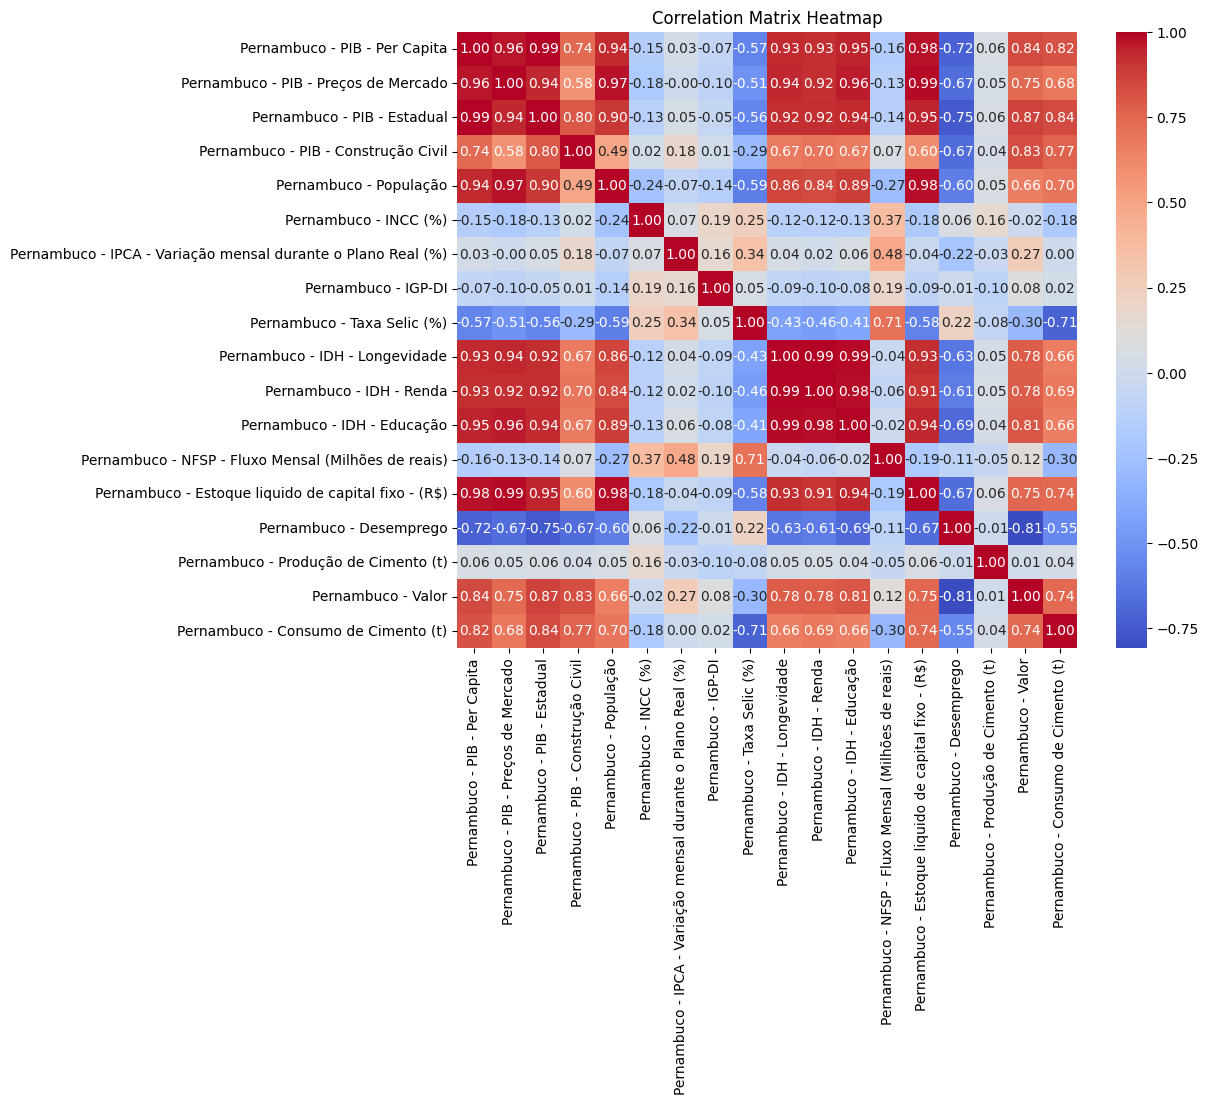

In [32]:
plot_data = data.iloc[:split_index + 1,1:]
plot_correlation_matrix(plot_data)

In [33]:
input_data = data.iloc[:split_index + 1,1:-1]
mean = np.mean(input_data, axis=0)
stddev =  np.std(input_data, axis=0)
input_data = ((input_data - mean) /stddev)
input_data = input_data.fillna(0.0)
input_data

,Pernambuco - PIB - Per Capita,Pernambuco - PIB - Preços de Mercado,Pernambuco - PIB - Estadual,Pernambuco - PIB - Construção Civil,Pernambuco - População,Pernambuco - INCC (%),Pernambuco - IPCA - Variação mensal durante o Plano Real (%),Pernambuco - IGP-DI,Pernambuco - Taxa Selic (%),Pernambuco - IDH - Longevidade,Pernambuco - IDH - Renda,Pernambuco - IDH - Educação,Pernambuco - NFSP - Fluxo Mensal (Milhões de reais),Pernambuco - Estoque liquido de capital fixo - (R$),Pernambuco - Desemprego,Pernambuco - Produção de Cimento (t),Pernambuco - Valor
0,-1.184814,-1.244913,-1.027835,0.246462,-1.631995,1.998868,4.052332,3.466715,2.303195,-0.922425,-0.927030,-0.911945,3.108599,-1.539424,0.135832,0.000000,-0.722482
1,-1.184814,-1.244913,-1.027835,0.246462,-1.631995,1.647487,-0.596188,2.630940,2.745235,-0.922425,-0.927030,-0.911945,3.275709,-1.411460,0.135832,-0.468324,-0.314052
2,-1.184814,-1.244913,-1.027835,0.246462,-1.631995,1.425561,0.131839,1.716318,2.879123,-0.922425,-0.927030,-0.911945,3.597074,-1.411460,0.135832,-0.387965,-0.314052
3,-1.184814,-1.244913,-1.027835,0.246462,-1.631995,1.407068,0.706121,1.826703,3.016721,-0.922425,-0.927030,-0.911945,3.738475,-1.411460,0.135832,-0.192631,-0.314052
4,-1.184814,-1.244913,-1.027835,0.246462,-1.631995,0.519367,1.167355,-0.144465,3.017322,-0.922425,-0.927030,-0.911945,3.879875,-1.411460,0.135832,-0.424581,-0.314052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.991368,1.663848,0.783803,-0.618933,1.586875,-0.590259,-0.966985,-1.264088,-0.729479,1.514303,1.538475,1.459908,-0.374997,1.441346,0.551274,0.165435,-0.403907
176,0.991368,1.663848,0.783803,-0.618933,1.586875,-0.479297,-0.881068,-0.412544,-0.941281,1.514303,1.538475,1.459908,-0.439270,1.441346,0.551274,-0.442435,-0.403907
177,0.991368,1.663848,0.783803,-0.618933,1.586875,-1.034110,-0.808718,0.186692,-1.140710,1.514303,1.538475,1.459908,-0.503543,1.441346,0.551274,-0.282527,-0.177909
178,0.991368,1.663848,0.783803,-0.618933,1.586875,-0.571766,-0.614276,-0.633314,-1.226481,1.514303,1.538475,1.459908,-0.503543,1.441346,0.597712,-0.510150,-0.224198


In [34]:
# input para treinamento
train_input = input_data.iloc[start_index:train_split]
train_input

,Pernambuco - PIB - Per Capita,Pernambuco - PIB - Preços de Mercado,Pernambuco - PIB - Estadual,Pernambuco - PIB - Construção Civil,Pernambuco - População,Pernambuco - INCC (%),Pernambuco - IPCA - Variação mensal durante o Plano Real (%),Pernambuco - IGP-DI,Pernambuco - Taxa Selic (%),Pernambuco - IDH - Longevidade,Pernambuco - IDH - Renda,Pernambuco - IDH - Educação,Pernambuco - NFSP - Fluxo Mensal (Milhões de reais),Pernambuco - Estoque liquido de capital fixo - (R$),Pernambuco - Desemprego,Pernambuco - Produção de Cimento (t),Pernambuco - Valor
0,-1.184814,-1.244913,-1.027835,0.246462,-1.631995,1.998868,4.052332,3.466715,2.303195,-0.922425,-0.927030,-0.911945,3.108599,-1.539424,0.135832,0.000000,-0.722482
1,-1.184814,-1.244913,-1.027835,0.246462,-1.631995,1.647487,-0.596188,2.630940,2.745235,-0.922425,-0.927030,-0.911945,3.275709,-1.411460,0.135832,-0.468324,-0.314052
2,-1.184814,-1.244913,-1.027835,0.246462,-1.631995,1.425561,0.131839,1.716318,2.879123,-0.922425,-0.927030,-0.911945,3.597074,-1.411460,0.135832,-0.387965,-0.314052
3,-1.184814,-1.244913,-1.027835,0.246462,-1.631995,1.407068,0.706121,1.826703,3.016721,-0.922425,-0.927030,-0.911945,3.738475,-1.411460,0.135832,-0.192631,-0.314052
4,-1.184814,-1.244913,-1.027835,0.246462,-1.631995,0.519367,1.167355,-0.144465,3.017322,-0.922425,-0.927030,-0.911945,3.879875,-1.411460,0.135832,-0.424581,-0.314052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,1.050303,1.418355,0.905915,0.153684,1.428652,-0.238878,0.629248,-1.406012,0.272188,1.302413,0.979627,1.385322,0.794771,1.416222,-0.841891,0.000000,0.549096
164,1.050303,1.418355,0.905915,0.153684,1.428652,-0.608753,0.837256,-0.112926,0.272188,1.302413,0.979627,1.385322,0.730498,1.416222,-0.795452,0.000000,0.549096
165,1.050303,1.418355,0.905915,0.153684,1.428652,-0.534778,0.877953,-0.743700,0.272188,1.302413,0.979627,1.385322,0.743353,1.416222,-0.749013,0.000000,0.366664
166,1.050303,1.418355,0.905915,0.153684,1.428652,-0.756703,1.000045,-0.586006,0.248413,1.302413,0.979627,1.385322,0.614807,1.416222,-0.749013,0.000000,0.320375


In [35]:
# Alvo para treinamento
train_target = target_data.iloc[start_index:train_split]
train_target

0       84.896
1       81.240
2      100.925
3       83.152
4       81.128
        ...   
163    158.533
164    133.813
165    155.827
166    146.197
167    122.278
Name: Pernambuco - Consumo de Cimento (t), Length: 168, dtype: float64

In [36]:
def create_batches(t_input, t_target, window_size, start_from):
    
    X_batches = []
    y_batches = []

    train_input_values = t_input.values 

    for i in range(len(t_input) - window_size):
        
        X_window = train_input_values[i:i+window_size, :]
        y_target = t_target[start_from+i+window_size]

        X_batches.append(X_window)
        y_batches.append(y_target)

    return np.array(X_batches), np.array(y_batches)

In [37]:
reshaped_train, reshaped_target = create_batches(train_input, 
                                                 train_target, 
                                                 window_size, 
                                                 start_index)
reshaped_train.shape

(132, 36, 17)

In [38]:
# input para treinamento
test_input = input_data.iloc[train_split - window_size:split_index + 1]
test_input

,Pernambuco - PIB - Per Capita,Pernambuco - PIB - Preços de Mercado,Pernambuco - PIB - Estadual,Pernambuco - PIB - Construção Civil,Pernambuco - População,Pernambuco - INCC (%),Pernambuco - IPCA - Variação mensal durante o Plano Real (%),Pernambuco - IGP-DI,Pernambuco - Taxa Selic (%),Pernambuco - IDH - Longevidade,Pernambuco - IDH - Renda,Pernambuco - IDH - Educação,Pernambuco - NFSP - Fluxo Mensal (Milhões de reais),Pernambuco - Estoque liquido de capital fixo - (R$),Pernambuco - Desemprego,Pernambuco - Produção de Cimento (t),Pernambuco - Valor
132,1.316887,1.067762,1.341778,1.662029,1.096916,-0.960135,1.058830,0.297077,-0.755853,0.878634,0.979627,1.086975,-0.285015,0.834026,-1.584912,-0.395717,1.327835
133,1.316887,1.067762,1.341778,1.662029,1.096916,0.482379,-1.364912,-0.160234,-0.688658,0.878634,0.979627,1.086975,-0.349288,1.129318,-1.352718,0.000000,1.325112
134,1.316887,1.067762,1.341778,1.662029,1.096916,-0.534778,-1.052901,0.549386,-0.626634,0.878634,0.979627,1.086975,-0.374997,1.129318,-1.213401,0.000000,1.463978
135,1.316887,1.067762,1.341778,1.662029,1.096916,-0.627247,-0.627842,1.542855,-0.571481,0.878634,0.979627,1.086975,-0.259306,1.129318,-1.306279,0.000000,1.491207
136,1.316887,1.067762,1.341778,1.662029,1.096916,0.482379,-0.320352,-0.081387,-0.516512,0.878634,0.979627,1.086975,-0.053632,1.129318,-1.399156,-0.131632,1.502098
137,1.316887,1.067762,1.341778,1.662029,1.096916,2.646150,-0.107822,-1.500628,-0.510405,0.878634,0.979627,1.086975,0.023495,1.129318,-1.492034,0.000000,1.502098
138,1.316887,1.067762,1.341778,1.662029,1.096916,0.075516,0.082098,-1.784477,-0.510405,0.878634,0.979627,1.086975,-0.002214,1.129318,-1.538473,0.000000,1.428581
139,1.316887,1.067762,1.341778,1.662029,1.096916,0.241960,0.086620,-1.658322,-0.510405,0.878634,0.979627,1.086975,-0.143614,1.129318,-1.631350,0.000000,1.611013
140,1.316887,1.067762,1.341778,1.662029,1.096916,-0.997122,0.204189,-0.696392,-0.510054,0.878634,0.979627,1.086975,-0.182178,1.129318,-1.724228,-0.397010,1.611013
141,1.316887,1.067762,1.341778,1.662029,1.096916,-0.867666,0.470982,-0.759469,-0.510405,0.878634,0.979627,1.086975,-0.105051,1.129318,-1.817106,0.000000,1.611013


In [39]:
reshaped_test, reshaped_test_target = create_batches(test_input, 
                                                     target_data, 
                                                     window_size, 
                                                     train_split - window_size)
reshaped_test.shape 

(12, 36, 17)

In [40]:
# Rede Neural Recorrente com optmizador Estocástico
def lstm_model(train_input, train_target, want_verbose=1, seed=0):
    if seed != 0:
        random.seed(seed)
        np.random.seed(seed)
        tf.random.set_seed(seed)
    # Aṕos 500 epochs sem grandes melhoras no val_loss, interrompe.
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                      patience=500, 
                                                      verbose=want_verbose, 
                                                      restore_best_weights=True,
                                                      start_from_epoch=500)
    # Método estocástico e learning rate=0.005
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.005)
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(72, activation='tanh', 
                            return_sequences=True, 
                            kernel_regularizer=tf.keras.regularizers.l2(0.01),  
                            input_shape=(reshaped_train.shape[1], reshaped_train.shape[2])),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(36, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=optimizer,
                  loss='mean_squared_error')    
    history = model.fit(train_input, 
                        train_target, 
                        epochs=10000,
                        validation_split=0.1,
                        callbacks=[early_stopping], 
                        verbose=want_verbose)
    return model, history

In [41]:
def get_a_good_seed(train_input, train_target, test_input, test_target):

    random_seeds = [random.randint(0, 2**32 - 1) for _ in range(10)]
    print(random_seeds)

    best_loss = float('inf')
    winner_seed = None
    i = 0
    for seed in random_seeds:
        print(f"\n\nStep: {i} ___________________________________________")
        i += 1

        model, history = lstm_model(train_input, train_target, want_verbose=0, seed=seed)
        current_loss = min(history.history['val_loss'][500:])
        print(f"val_loss: {current_loss}")

        if current_loss < best_loss:
            best_loss = current_loss
            winner_seed = seed
            print(f"winner_seed: {winner_seed}")
            if winner_seed == 0.0:
                return winner_seed

    return winner_seed

In [42]:
def predictor(model, test_input, test_target, start_target):
    
    predictions = []
    results_data = []

    for i in range(len(test_target)):
        prediction = model.predict(test_input[i:i+1])
        if (prediction[0][0] < 0.0):
            return None, None
        predictions.append(prediction[0][0])
        target = test_target[start_target + i]
        error = np.abs(prediction - target)
        results_data.append([f"Month-{i + 1}", 
                             prediction[0][0], 
                             target, 
                             error[0][0]])

    df_results = pd.DataFrame(results_data, columns=["Month", "Prediction", "Target", "Error"])

    return df_results, predictions

In [43]:
def statistical_validator(train_input, train_target, test_input, test_target, start_target):
    
    pd.set_option('display.max_columns', None)
    predictions_list = []
    error_percent = []
    
    i = 0
    while i < 10:
        winner_seed = get_a_good_seed(train_input, train_target, test_input, test_target)
        trained_model, history = lstm_model(train_input, 
                                            train_target, 
                                            want_verbose=0, 
                                            seed=winner_seed)
        df_results, predictions = predictor(trained_model, 
                                            test_input, 
                                            test_target, 
                                            start_index)
        if predictions is not None:
            display(df_results.T)
            predictions_list.append(predictions)
            i += 1
        
    predictions_means = np.mean(predictions_list, axis=0)
    results_data = []
   
    for j in range(12):
        target = test_target[start_target + j]
        error = np.abs(predictions_means[j] - target)
        error_percent.append(error/target)
        results_data.append([f"Month-{i + 1}", 
                            predictions_means[j], 
                            target, 
                            error])
    display("FINAL___________________________________________________________________")
    df_results = pd.DataFrame(results_data, columns=["Month", "Prediction", "Target", "Error"])
    display(df_results.T)
        
    mae_mean = np.mean(predictions_means)
    mape_mean = np.mean(error_percent) 

    return mae_mean, mape_mean

In [44]:
mae, mape = statistical_validator(reshaped_train, 
                                  reshaped_target, 
                                  reshaped_test, 
                                  reshaped_test_target, 
                                  start_index)

[3750770902, 2244913617, 2694156637, 3353321727, 448116434, 2384990768, 1487837649, 3708478051, 1809881291, 2849837925]


Step: 0 ___________________________________________
val_loss: 345.41009521484375
winner_seed: 3750770902


Step: 1 ___________________________________________
val_loss: 242.8606414794922
winner_seed: 2244913617


Step: 2 ___________________________________________
val_loss: 234.9921112060547
winner_seed: 2694156637


Step: 3 ___________________________________________
val_loss: 203.8432159423828
winner_seed: 3353321727


Step: 4 ___________________________________________
val_loss: 330.5648498535156


Step: 5 ___________________________________________
val_loss: 225.3559112548828


Step: 6 ___________________________________________
val_loss: 200.4896697998047
winner_seed: 1487837649


Step: 7 ___________________________________________
val_loss: 282.0339050292969


Step: 8 ___________________________________________
val_loss: 168.33522033691406
winner_seed: 1809881

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,141.731506,138.882507,142.017899,141.409607,135.19693,130.302109,140.206787,146.892822,147.401337,148.057068,142.865707,147.925629
Target,149.983,123.483,125.104,129.633,138.233,109.657,128.809,140.408,134.634,189.04,166.406,155.456
Error,8.251495,15.399506,16.913902,11.776611,3.036072,20.645111,11.397781,6.484818,12.767334,40.982925,23.540298,7.530365


[1712761674, 3593812749, 1675063556, 1243506038, 3810313784, 1454244826, 628250658, 1587871117, 1670158404, 1908979963]


Step: 0 ___________________________________________
val_loss: 177.64517211914062
winner_seed: 1712761674


Step: 1 ___________________________________________
val_loss: 246.61563110351562


Step: 2 ___________________________________________
val_loss: 245.1429443359375


Step: 3 ___________________________________________
val_loss: 190.69656372070312


Step: 4 ___________________________________________
val_loss: 212.0598907470703


Step: 5 ___________________________________________
val_loss: 180.8291778564453


Step: 6 ___________________________________________
val_loss: 302.74151611328125


Step: 7 ___________________________________________
val_loss: 173.55674743652344
winner_seed: 1587871117


Step: 8 ___________________________________________
val_loss: 200.24281311035156


Step: 9 ___________________________________________
val_loss: 293.9368591308594
1/1 [=

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,135.850616,133.976349,137.51297,136.306015,134.411743,136.458923,150.133087,149.830811,153.522614,148.684097,140.129944,139.081726
Target,149.983,123.483,125.104,129.633,138.233,109.657,128.809,140.408,134.634,189.04,166.406,155.456
Error,14.132385,10.493347,12.408974,6.673019,3.821259,26.801926,21.324081,9.422806,18.888611,40.355896,26.276062,16.374268


[4273421825, 763446297, 494443856, 1657263767, 3880226860, 667076792, 1476979650, 3536055819, 2599492397, 2839125049]


Step: 0 ___________________________________________
val_loss: 255.1597900390625
winner_seed: 4273421825


Step: 1 ___________________________________________
val_loss: 196.8805389404297
winner_seed: 763446297


Step: 2 ___________________________________________
val_loss: 187.98312377929688
winner_seed: 494443856


Step: 3 ___________________________________________
val_loss: 207.0993194580078


Step: 4 ___________________________________________
val_loss: 306.62017822265625


Step: 5 ___________________________________________
val_loss: 198.8184356689453


Step: 6 ___________________________________________
val_loss: 179.4369354248047
winner_seed: 1476979650


Step: 7 ___________________________________________
val_loss: 177.7533416748047
winner_seed: 3536055819


Step: 8 ___________________________________________
val_loss: 319.76763916015625


Step: 9 _____________

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,146.216187,137.963821,140.645065,138.559799,135.286743,133.806076,148.277649,154.57576,158.455444,161.901581,148.837158,143.584885
Target,149.983,123.483,125.104,129.633,138.233,109.657,128.809,140.408,134.634,189.04,166.406,155.456
Error,3.766815,14.48082,15.541069,8.926804,2.946259,24.149078,19.468643,14.167755,23.821442,27.138412,17.568848,11.871109


[1301033401, 4086179499, 1219812491, 478291592, 2965770955, 4252560188, 4179416858, 3591294717, 439835828, 278878627]


Step: 0 ___________________________________________
val_loss: 196.89088439941406
winner_seed: 1301033401


Step: 1 ___________________________________________
val_loss: 257.3795166015625


Step: 2 ___________________________________________
val_loss: 4040260.5


Step: 3 ___________________________________________
val_loss: 294.28955078125


Step: 4 ___________________________________________
val_loss: 288.8850402832031


Step: 5 ___________________________________________
val_loss: 277.9501647949219


Step: 6 ___________________________________________
val_loss: 331.22869873046875


Step: 7 ___________________________________________
val_loss: 176.16867065429688
winner_seed: 3591294717


Step: 8 ___________________________________________
val_loss: 264.2005920410156


Step: 9 ___________________________________________
val_loss: 762.8739624023438
1/1 [================

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,135.649307,134.072586,133.217819,132.718216,132.366608,133.344696,141.877106,145.879181,141.931091,141.863968,135.716049,133.961472
Target,149.983,123.483,125.104,129.633,138.233,109.657,128.809,140.408,134.634,189.04,166.406,155.456
Error,14.333694,10.589584,8.113823,3.08522,5.866394,23.687698,13.0681,5.471176,7.297089,47.176025,30.689957,21.494522


[3379958273, 1038613785, 3759216225, 2878751694, 433955734, 3867017514, 869627625, 3467648283, 1966521736, 205280467]


Step: 0 ___________________________________________
val_loss: 210.74853515625
winner_seed: 3379958273


Step: 1 ___________________________________________
val_loss: 235.80722045898438


Step: 2 ___________________________________________
val_loss: 187.4822998046875
winner_seed: 3759216225


Step: 3 ___________________________________________
val_loss: 285.9421081542969


Step: 4 ___________________________________________
val_loss: 290.2773742675781


Step: 5 ___________________________________________
val_loss: 283.70587158203125


Step: 6 ___________________________________________
val_loss: 231.59927368164062


Step: 7 ___________________________________________
val_loss: 186.34596252441406
winner_seed: 3467648283


Step: 8 ___________________________________________
val_loss: 255.51231384277344


Step: 9 ___________________________________________
val_loss: 134.1

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,134.198074,136.408691,134.530243,153.530258,138.55188,144.859695,151.17627,159.581375,150.652298,151.473907,140.204742,146.109543
Target,149.983,123.483,125.104,129.633,138.233,109.657,128.809,140.408,134.634,189.04,166.406,155.456
Error,15.784927,12.92569,9.426247,23.897263,0.318878,35.202698,22.367264,19.17337,16.018295,37.566086,26.201263,9.346451


[2006356640, 643201660, 1882340582, 1824342820, 1670358772, 2281441391, 3318955449, 129369851, 4267037248, 2995517654]


Step: 0 ___________________________________________
val_loss: 32348.970703125
winner_seed: 2006356640


Step: 1 ___________________________________________
val_loss: 431.150390625
winner_seed: 643201660


Step: 2 ___________________________________________
val_loss: 252.1465606689453
winner_seed: 1882340582


Step: 3 ___________________________________________
val_loss: 179.74147033691406
winner_seed: 1824342820


Step: 4 ___________________________________________
val_loss: 258.9014892578125


Step: 5 ___________________________________________
val_loss: 200.14625549316406


Step: 6 ___________________________________________
val_loss: 173.37953186035156
winner_seed: 3318955449


Step: 7 ___________________________________________
val_loss: 233.0143280029297


Step: 8 ___________________________________________
val_loss: 162.15415954589844
winner_seed: 4267037248




,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,142.564423,138.74353,135.021301,130.650528,131.558533,137.469696,148.564041,157.573334,150.549713,157.126389,144.67305,142.33403
Target,149.983,123.483,125.104,129.633,138.233,109.657,128.809,140.408,134.634,189.04,166.406,155.456
Error,7.418579,15.260529,9.917305,1.017532,6.674469,27.812698,19.755035,17.165329,15.91571,31.913605,21.732956,13.121964


[3770865720, 497918401, 1206441634, 2170064114, 3336095499, 1839272777, 3652619618, 1663706027, 4026570490, 1687662233]


Step: 0 ___________________________________________
val_loss: 204.1602783203125
winner_seed: 3770865720


Step: 1 ___________________________________________
val_loss: 298.7673645019531


Step: 2 ___________________________________________
val_loss: 246.2542724609375


Step: 3 ___________________________________________
val_loss: 188.77906799316406
winner_seed: 2170064114


Step: 4 ___________________________________________
val_loss: 243.95730590820312


Step: 5 ___________________________________________
val_loss: 239.5697021484375


Step: 6 ___________________________________________
val_loss: 27482928.0


Step: 7 ___________________________________________
val_loss: 312.37823486328125


Step: 8 ___________________________________________
val_loss: 311.833251953125


Step: 9 ___________________________________________
val_loss: 290.9901123046875
1/1 [============

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,142.699844,133.703888,140.015366,140.586838,133.510056,132.339523,134.984665,134.60173,142.256226,140.61824,140.485031,137.499039
Target,149.983,123.483,125.104,129.633,138.233,109.657,128.809,140.408,134.634,189.04,166.406,155.456
Error,7.283157,10.220886,14.911369,10.953842,4.722946,22.682526,6.175659,5.806274,7.622223,48.421753,25.920975,17.956955


[471748979, 1992258083, 1816318978, 1274889229, 4000498391, 1802101846, 737610246, 2499006093, 977986386, 1220024663]


Step: 0 ___________________________________________
val_loss: 262.8126220703125
winner_seed: 471748979


Step: 1 ___________________________________________
val_loss: 170.0804901123047
winner_seed: 1992258083


Step: 2 ___________________________________________
val_loss: 209.04598999023438


Step: 3 ___________________________________________
val_loss: 406.96563720703125


Step: 4 ___________________________________________
val_loss: 175.75999450683594


Step: 5 ___________________________________________
val_loss: 1652.705810546875


Step: 6 ___________________________________________
val_loss: 196.73532104492188


Step: 7 ___________________________________________
val_loss: 375.281494140625


Step: 8 ___________________________________________
val_loss: 184.08505249023438


Step: 9 ___________________________________________
val_loss: 297.5533142089844
1/1 [======

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,129.905426,133.243896,132.472549,132.220718,132.192001,133.048462,132.47934,139.335846,133.132431,132.833344,133.442871,131.967606
Target,149.983,123.483,125.104,129.633,138.233,109.657,128.809,140.408,134.634,189.04,166.406,155.456
Error,20.077576,9.760895,7.368553,2.587723,6.041,23.391464,3.670334,1.072159,1.501572,56.20665,32.963135,23.488388


[2050283919, 217140231, 2197630491, 2434992653, 1707325741, 1006410774, 2041758236, 209150106, 2289347949, 2270844657]


Step: 0 ___________________________________________
val_loss: 293.2788391113281
winner_seed: 2050283919


Step: 1 ___________________________________________
val_loss: 262.00384521484375
winner_seed: 217140231


Step: 2 ___________________________________________
val_loss: 226.4066619873047
winner_seed: 2197630491


Step: 3 ___________________________________________
val_loss: 260.8741455078125


Step: 4 ___________________________________________
val_loss: 186.06224060058594
winner_seed: 1707325741


Step: 5 ___________________________________________
val_loss: 368.63177490234375


Step: 6 ___________________________________________
val_loss: 211.4026641845703


Step: 7 ___________________________________________
val_loss: 219.0576629638672


Step: 8 ___________________________________________
val_loss: 276.134765625


Step: 9 _______________________________________

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,138.206192,138.777298,140.942017,139.491531,136.777557,130.774353,137.015137,144.555664,138.263794,136.85257,132.910507,131.778595
Target,149.983,123.483,125.104,129.633,138.233,109.657,128.809,140.408,134.634,189.04,166.406,155.456
Error,11.77681,15.294296,15.83802,9.858536,1.455444,21.117355,8.206131,4.147659,3.629791,52.187424,33.495499,23.677399


[2918106493, 2982091550, 615059494, 3202100627, 1014609289, 2399287777, 3495919056, 1684230540, 725329607, 275900208]


Step: 0 ___________________________________________
val_loss: 276.0745849609375
winner_seed: 2918106493


Step: 1 ___________________________________________
val_loss: 243.81906127929688
winner_seed: 2982091550


Step: 2 ___________________________________________
val_loss: 210.10415649414062
winner_seed: 615059494


Step: 3 ___________________________________________
val_loss: 185.4770050048828
winner_seed: 3202100627


Step: 4 ___________________________________________
val_loss: 191.4063262939453


Step: 5 ___________________________________________
val_loss: 187.60787963867188


Step: 6 ___________________________________________
val_loss: 172.77587890625
winner_seed: 3495919056


Step: 7 ___________________________________________
val_loss: 225.3883514404297


Step: 8 ___________________________________________
val_loss: 284.9324951171875


Step: 9 ______________

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,143.645142,134.847198,142.217346,145.366272,134.759644,140.796661,143.476868,144.011932,156.713898,155.656769,162.077911,165.050293
Target,149.983,123.483,125.104,129.633,138.233,109.657,128.809,140.408,134.634,189.04,166.406,155.456
Error,6.33786,11.364197,17.11335,15.733276,3.473358,31.139664,14.667862,3.603928,22.079895,33.383224,4.328094,9.594299


'FINAL___________________________________________________________________'

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11
Prediction,139.066666,136.061981,137.859283,139.083984,134.461166,135.320023,142.819092,147.683838,147.287872,147.50679,142.134308,141.929291
Target,149.983,123.483,125.104,129.633,138.233,109.657,128.809,140.408,134.634,189.04,166.406,155.456
Error,10.916334,12.578981,12.755283,9.450984,3.771834,25.663023,14.010092,7.275838,12.653872,41.53321,24.271692,13.526709


In [45]:
display(mae)
display(mape)

140.93452

0.10983177093106204